In [253]:
import pandas as pd

In [254]:
train = pd.read_csv(r'D:\data science\T1_hol\train (1).csv')
train

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,price
0,0,Secondary,Ботанический сад,13,Moscow,3,52.89,25.0,12.6,3,10,European-style renovation,18084832.0
1,1,New building,Нагатинская,23,Moscow,2,44.25,25.5,10.0,8,17,Cosmetic,16737304.0
2,2,Secondary,Аминьевская,5,Moscow,3,70.74,28.8,9.6,7,22,Cosmetic,35301363.0
3,3,Secondary,Белорусская,12,Moscow,3,37.91,28.2,11.5,6,9,Without renovation,14619353.0
4,4,New building,Кантемировская,19,Moscow,1,49.30,15.9,24.3,2,10,Cosmetic,13235613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30363,30363,Secondary,Бунинская аллея,16,Moscow,3,22.61,11.7,6.3,29,5,European-style renovation,5546540.0
30364,30364,Secondary,Савеловская,14,Moscow,3,87.40,51.9,19.3,3,35,Without renovation,39386266.0
30365,30365,Secondary,Фили,19,Moscow,4,91.03,49.2,18.9,20,37,Designer,32198037.0
30366,30366,Secondary,ЗИЛ,13,Moscow,5,267.59,191.1,28.1,7,5,European-style renovation,364926089.0


In [255]:
train

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,price
0,0,Secondary,Ботанический сад,13,Moscow,3,52.89,25.0,12.6,3,10,European-style renovation,18084832.0
1,1,New building,Нагатинская,23,Moscow,2,44.25,25.5,10.0,8,17,Cosmetic,16737304.0
2,2,Secondary,Аминьевская,5,Moscow,3,70.74,28.8,9.6,7,22,Cosmetic,35301363.0
3,3,Secondary,Белорусская,12,Moscow,3,37.91,28.2,11.5,6,9,Without renovation,14619353.0
4,4,New building,Кантемировская,19,Moscow,1,49.30,15.9,24.3,2,10,Cosmetic,13235613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30363,30363,Secondary,Бунинская аллея,16,Moscow,3,22.61,11.7,6.3,29,5,European-style renovation,5546540.0
30364,30364,Secondary,Савеловская,14,Moscow,3,87.40,51.9,19.3,3,35,Without renovation,39386266.0
30365,30365,Secondary,Фили,19,Moscow,4,91.03,49.2,18.9,20,37,Designer,32198037.0
30366,30366,Secondary,ЗИЛ,13,Moscow,5,267.59,191.1,28.1,7,5,European-style renovation,364926089.0


In [256]:
station_avg_price = train.groupby('metro_station')['price'].mean()

# 2. Присваиваем категории станциям метро по средней стоимости
def categorize_price(price):
    if price <= 10_000_000:
        return 0  # Дешевые
    elif price <= 23_000_000:
        return 1  # Средние
    else:
        return 2  # Престижные

# Применяем функцию для каждой станции
station_prestige = station_avg_price.apply(categorize_price)

# 3. Присоединяем категорию к исходному датафрейму
train['metro_prestige'] = train['metro_station'].map(station_prestige)

# Вывод результата
print("Средняя стоимость по станциям:")
print(station_avg_price)
print("\nДатафрейм с категориями:")
print(train)

Средняя стоимость по станциям:
metro_station
Авиамоторная           2.199829e+07
Автозаводская          2.646474e+07
Академическая          3.792584e+07
Александровский сад    4.140970e+07
Алексеевская           3.180904e+07
                           ...     
Юго-Восточная          2.369738e+07
Юго-Западная           4.614108e+07
Южная                  1.854184e+07
Ясенево                1.623640e+07
Яхромская              3.883320e+07
Name: price, Length: 317, dtype: float64

Датафрейм с категориями:
       index apartment_type       metro_station  minutes_to_metro  region  \
0          0      Secondary    Ботанический сад                13  Moscow   
1          1   New building         Нагатинская                23  Moscow   
2          2      Secondary         Аминьевская                 5  Moscow   
3          3      Secondary         Белорусская                12  Moscow   
4          4   New building      Кантемировская                19  Moscow   
...      ...            ...   

In [257]:
from collections import Counter
Counter(train['metro_prestige'])

Counter({2: 13764, 1: 11126, 0: 5478})

In [258]:
train

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,price,metro_prestige
0,0,Secondary,Ботанический сад,13,Moscow,3,52.89,25.0,12.6,3,10,European-style renovation,18084832.0,1
1,1,New building,Нагатинская,23,Moscow,2,44.25,25.5,10.0,8,17,Cosmetic,16737304.0,2
2,2,Secondary,Аминьевская,5,Moscow,3,70.74,28.8,9.6,7,22,Cosmetic,35301363.0,2
3,3,Secondary,Белорусская,12,Moscow,3,37.91,28.2,11.5,6,9,Without renovation,14619353.0,2
4,4,New building,Кантемировская,19,Moscow,1,49.30,15.9,24.3,2,10,Cosmetic,13235613.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30363,30363,Secondary,Бунинская аллея,16,Moscow,3,22.61,11.7,6.3,29,5,European-style renovation,5546540.0,1
30364,30364,Secondary,Савеловская,14,Moscow,3,87.40,51.9,19.3,3,35,Without renovation,39386266.0,1
30365,30365,Secondary,Фили,19,Moscow,4,91.03,49.2,18.9,20,37,Designer,32198037.0,2
30366,30366,Secondary,ЗИЛ,13,Moscow,5,267.59,191.1,28.1,7,5,European-style renovation,364926089.0,2


In [259]:
test = pd.read_csv(r'D:\data science\T1_hol\test (1).csv')
test

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation
0,0,New building,Братиславская,12,Moscow,1,55.92,31.9,11.3,13,14,Cosmetic
1,1,Secondary,Зябликово,12,Moscow,4,129.06,64.6,10.0,3,9,Designer
2,2,Secondary,Кожуховская,23,Moscow,0,26.43,20.8,4.7,20,9,European-style renovation
3,3,New building,Братиславская,10,Moscow,1,39.14,27.9,8.6,9,20,Cosmetic
4,4,New building,Депо,12,Moscow,2,105.99,62.0,15.7,19,11,Cosmetic
...,...,...,...,...,...,...,...,...,...,...,...,...
7587,7587,Secondary,Комсомольская,9,Moscow,4,109.78,60.6,15.6,2,10,Designer
7588,7588,Secondary,Алма-Атинская,13,Moscow region,2,29.31,15.2,10.9,1,22,Cosmetic
7589,7589,Secondary,Лермонтовский проспект,6,Moscow,4,90.61,56.0,20.6,23,27,European-style renovation
7590,7590,New building,Полянка,5,Moscow,4,82.14,46.2,20.6,10,28,Without renovation


In [260]:
import pandas as pd



# Создание словаря соответствия станций метро и их престижности
metro_prestige_dict = train.groupby('metro_station')['metro_prestige'].mean().to_dict()

# Функция для добавления признака престижности метро
def add_metro_prestige(df, metro_prestige_dict):
    df['metro_prestige'] = df['metro_station'].map(metro_prestige_dict)
    # Заполнение пропущенных значений средним значением престижности
    df['metro_prestige'].fillna(df['metro_prestige'].mean(), inplace=True)
    return df

# Добавление признака престижности метро в тестовый датасет
test = add_metro_prestige(test, metro_prestige_dict)

# Вывод первых 5 строк тестового датасета для проверки
print(test.head())

# Сохранение обновленного тестового датасета (опционально)
test.to_csv('test_with_metro_prestige.csv', index=False) # Замените 'test_with_metro_prestige.csv' на желаемое имя файла

   index apartment_type  metro_station  minutes_to_metro  region  \
0      0   New building  Братиславская                12  Moscow   
1      1      Secondary      Зябликово                12  Moscow   
2      2      Secondary    Кожуховская                23  Moscow   
3      3   New building  Братиславская                10  Moscow   
4      4   New building           Депо                12  Moscow   

   number_of_rooms    area  living_area  kitchen_area  floor  \
0                1   55.92         31.9          11.3     13   
1                4  129.06         64.6          10.0      3   
2                0   26.43         20.8           4.7     20   
3                1   39.14         27.9           8.6      9   
4                2  105.99         62.0          15.7     19   

   number_of_floors                 renovation  metro_prestige  
0                14                   Cosmetic             1.0  
1                 9                   Designer             0.0  
2          

C:\Users\danie\AppData\Local\Temp\ipykernel_15424\1420076602.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['metro_prestige'].fillna(df['metro_prestige'].mean(), inplace=True)


In [261]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
train['apartment_type'] = le1.fit_transform(train['apartment_type'])
train['region'] = le2.fit_transform(train['region'])
train['renovation'] = le3.fit_transform(train['renovation'])
train['metro_station'] = le4.fit_transform(train['metro_station'])

In [262]:
train

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,price,metro_prestige
0,0,1,33,13,0,3,52.89,25.0,12.6,3,10,2,18084832.0,1
1,1,0,148,23,0,2,44.25,25.5,10.0,8,17,0,16737304.0,2
2,2,1,7,5,0,3,70.74,28.8,9.6,7,22,0,35301363.0,2
3,3,1,22,12,0,3,37.91,28.2,11.5,6,9,3,14619353.0,2
4,4,0,85,19,0,1,49.30,15.9,24.3,2,10,0,13235613.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30363,30363,1,39,16,0,3,22.61,11.7,6.3,29,5,2,5546540.0,1
30364,30364,1,225,14,0,3,87.40,51.9,19.3,3,35,3,39386266.0,1
30365,30365,1,285,19,0,4,91.03,49.2,18.9,20,37,1,32198037.0,2
30366,30366,1,76,13,0,5,267.59,191.1,28.1,7,5,2,364926089.0,2


In [263]:
# import pandas as pd

# def categorize_apartment_size(df):


#   df['apartment_size_category'] = pd.cut(
#       df['area'],
#       bins=[0, 30, 70, 140, df['area'].max()],
#       labels=[0, 1, 2, 3],
#       include_lowest=True
#   )
#   return df


# train = categorize_apartment_size(train).astype(int)
# # train['apartment_size_category'] = train['apartment_size_category']
# train

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30368 entries, 0 to 30367
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             30368 non-null  int64  
 1   apartment_type    30368 non-null  int32  
 2   metro_station     30368 non-null  int32  
 3   minutes_to_metro  30368 non-null  int64  
 4   region            30368 non-null  int32  
 5   number_of_rooms   30368 non-null  int64  
 6   area              30368 non-null  float64
 7   living_area       30368 non-null  float64
 8   kitchen_area      30368 non-null  float64
 9   floor             30368 non-null  int64  
 10  number_of_floors  30368 non-null  int64  
 11  renovation        30368 non-null  int32  
 12  price             30368 non-null  float64
 13  metro_prestige    30368 non-null  int64  
dtypes: float64(4), int32(4), int64(6)
memory usage: 2.8 MB


In [265]:
# test['apartment_size_category'] = test['apartment_size_category'].astype(int)

In [266]:
# lst = []
# for i in train['area']:
#     lst.append(int(i))
# set(lst)

In [267]:
test

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,metro_prestige
0,0,New building,Братиславская,12,Moscow,1,55.92,31.9,11.3,13,14,Cosmetic,1.0
1,1,Secondary,Зябликово,12,Moscow,4,129.06,64.6,10.0,3,9,Designer,0.0
2,2,Secondary,Кожуховская,23,Moscow,0,26.43,20.8,4.7,20,9,European-style renovation,1.0
3,3,New building,Братиславская,10,Moscow,1,39.14,27.9,8.6,9,20,Cosmetic,1.0
4,4,New building,Депо,12,Moscow,2,105.99,62.0,15.7,19,11,Cosmetic,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,7587,Secondary,Комсомольская,9,Moscow,4,109.78,60.6,15.6,2,10,Designer,2.0
7588,7588,Secondary,Алма-Атинская,13,Moscow region,2,29.31,15.2,10.9,1,22,Cosmetic,0.0
7589,7589,Secondary,Лермонтовский проспект,6,Moscow,4,90.61,56.0,20.6,23,27,European-style renovation,1.0
7590,7590,New building,Полянка,5,Moscow,4,82.14,46.2,20.6,10,28,Without renovation,2.0


In [268]:
lst = []
for i in train['metro_prestige']:
    lst.append(int(i))
train['metro_prestige'] = lst
lst2 = []
for i in test['metro_prestige']:
    lst2.append(int(i))
test['metro_prestige'] = lst2

In [269]:
test

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,metro_prestige
0,0,New building,Братиславская,12,Moscow,1,55.92,31.9,11.3,13,14,Cosmetic,1
1,1,Secondary,Зябликово,12,Moscow,4,129.06,64.6,10.0,3,9,Designer,0
2,2,Secondary,Кожуховская,23,Moscow,0,26.43,20.8,4.7,20,9,European-style renovation,1
3,3,New building,Братиславская,10,Moscow,1,39.14,27.9,8.6,9,20,Cosmetic,1
4,4,New building,Депо,12,Moscow,2,105.99,62.0,15.7,19,11,Cosmetic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587,7587,Secondary,Комсомольская,9,Moscow,4,109.78,60.6,15.6,2,10,Designer,2
7588,7588,Secondary,Алма-Атинская,13,Moscow region,2,29.31,15.2,10.9,1,22,Cosmetic,0
7589,7589,Secondary,Лермонтовский проспект,6,Moscow,4,90.61,56.0,20.6,23,27,European-style renovation,1
7590,7590,New building,Полянка,5,Moscow,4,82.14,46.2,20.6,10,28,Without renovation,2


In [270]:
train

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,price,metro_prestige
0,0,1,33,13,0,3,52.89,25.0,12.6,3,10,2,18084832.0,1
1,1,0,148,23,0,2,44.25,25.5,10.0,8,17,0,16737304.0,2
2,2,1,7,5,0,3,70.74,28.8,9.6,7,22,0,35301363.0,2
3,3,1,22,12,0,3,37.91,28.2,11.5,6,9,3,14619353.0,2
4,4,0,85,19,0,1,49.30,15.9,24.3,2,10,0,13235613.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30363,30363,1,39,16,0,3,22.61,11.7,6.3,29,5,2,5546540.0,1
30364,30364,1,225,14,0,3,87.40,51.9,19.3,3,35,3,39386266.0,1
30365,30365,1,285,19,0,4,91.03,49.2,18.9,20,37,1,32198037.0,2
30366,30366,1,76,13,0,5,267.59,191.1,28.1,7,5,2,364926089.0,2


In [271]:
import numpy as np
skewed_features=['price']

log_numerical_features=[]

for f in skewed_features:
    train[f + '_log']=np.log10(train[f])
    log_numerical_features.append(f + '_log')

In [272]:
train

,index,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,price,metro_prestige,price_log
0,0,1,33,13,0,3,52.89,25.0,12.6,3,10,2,18084832.0,1,7.257314
1,1,0,148,23,0,2,44.25,25.5,10.0,8,17,0,16737304.0,2,7.223686
2,2,1,7,5,0,3,70.74,28.8,9.6,7,22,0,35301363.0,2,7.547791
3,3,1,22,12,0,3,37.91,28.2,11.5,6,9,3,14619353.0,2,7.164928
4,4,0,85,19,0,1,49.30,15.9,24.3,2,10,0,13235613.0,1,7.121744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30363,30363,1,39,16,0,3,22.61,11.7,6.3,29,5,2,5546540.0,1,6.744022
30364,30364,1,225,14,0,3,87.40,51.9,19.3,3,35,3,39386266.0,1,7.595345
30365,30365,1,285,19,0,4,91.03,49.2,18.9,20,37,1,32198037.0,2,7.507829
30366,30366,1,76,13,0,5,267.59,191.1,28.1,7,5,2,364926089.0,2,8.562205


In [273]:
X = train.drop(['index','price','price_log'],axis=1)
y = train['price_log']

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24294 entries, 25061 to 23654
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   apartment_type    24294 non-null  int32  
 1   metro_station     24294 non-null  int32  
 2   minutes_to_metro  24294 non-null  int64  
 3   region            24294 non-null  int32  
 4   number_of_rooms   24294 non-null  int64  
 5   area              24294 non-null  float64
 6   living_area       24294 non-null  float64
 7   kitchen_area      24294 non-null  float64
 8   floor             24294 non-null  int64  
 9   number_of_floors  24294 non-null  int64  
 10  renovation        24294 non-null  int32  
 11  metro_prestige    24294 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.0 MB


# Random Forest

In [276]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import StandardScaler
# rf_model = RandomForestClassifier(n_jobs=-1)

# rf_model.fit(X_train, y_train)

# lightgbm

In [277]:
# import lightgbm as lgb
# model = lgb.LGBMRegressor(learning_rate=0.03, max_depth=-1,boosting='gbdt',reg_sqrt = True,max_bin = 5000,early_stopping_round = 50,num_rounds = 5000,num_leaves = 1200,metric='MAPE', random_state=42)
# model.fit(X_train, y_train ,eval_set=[(X_test, y_test)])

# Catboost

Learning rate set to 0.084027
0:	learn: 0.4028652	test: 0.4007351	best: 0.4007351 (0)	total: 2.25ms	remaining: 2.25s
200:	learn: 0.1470268	test: 0.1510188	best: 0.1510188 (200)	total: 367ms	remaining: 1.46s
400:	learn: 0.1394925	test: 0.1469892	best: 0.1469892 (400)	total: 704ms	remaining: 1.05s
600:	learn: 0.1346211	test: 0.1450431	best: 0.1450431 (600)	total: 1.04s	remaining: 693ms
800:	learn: 0.1309432	test: 0.1442392	best: 0.1442301 (793)	total: 1.4s	remaining: 349ms
999:	learn: 0.1275446	test: 0.1437142	best: 0.1437134 (996)	total: 1.74s	remaining: 0us

bestTest = 0.1437134154
bestIteration = 996

Shrink model to first 997 iterations.
             feature  importance
5               area   45.888948
11    metro_prestige   15.118887
1      metro_station   11.125442
10        renovation    6.010937
3             region    4.941492
6        living_area    3.618085
0     apartment_type    3.022135
7       kitchen_area    2.983209
9   number_of_floors    2.329773
8              floor  

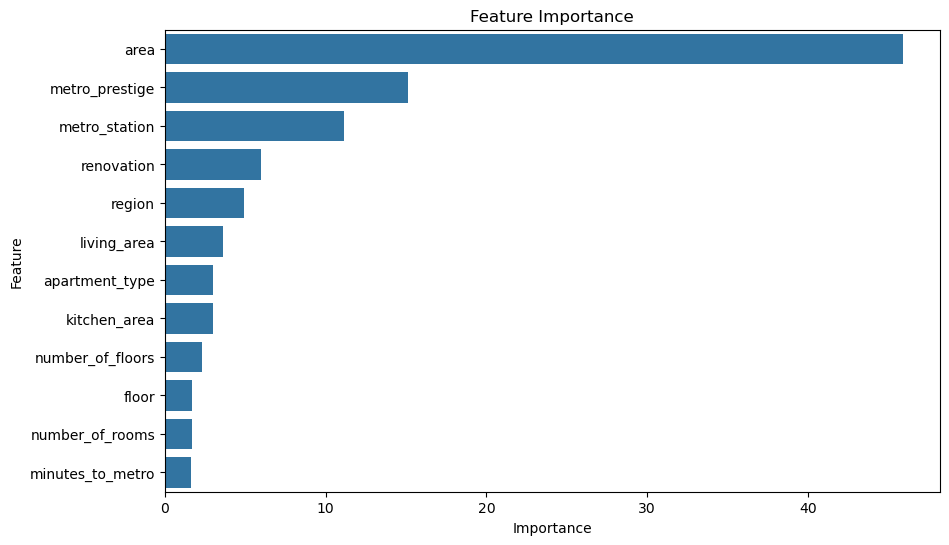

In [278]:
from catboost import CatBoostRegressor, Pool
import pandas as pd

# Предположим, что у вас уже есть X_train, y_train, X_test, y_test
# Если нет, то нужно разделить ваш датасет на обучающую и тестовую выборки

# Пример разделения датасета (если он у вас еще не разделен)



model3 = CatBoostRegressor()
model3.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=200)

# Получение важности признаков
feature_importance = model3.get_feature_importance()

# Имена признаков
feature_names = X_train.columns

# Создание DataFrame для удобства отображения
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# Сортировка по убыванию важности
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Вывод важности признаков
print(feature_importance_df)

# Визуализация важности признаков (опционально)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [279]:
# from catboost import CatBoostRegressor
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import lightgbm as lgb
# import seaborn as sns
# from sklearn.model_selection import train_test_split

# # Разделение данных на обучающую и тестовую выборки
# # Предположим, что у вас есть DataFrame `df` с признаками и целевой переменной `target`

# # Создание трех моделей CatBoostRegressor с разными параметрами
# model1 = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, random_seed=42, verbose=200)
# model2 = lgb.LGBMRegressor(learning_rate=0.03, max_depth=-1,boosting='gbdt',reg_sqrt = True,max_bin = 5000,early_stopping_round = 50,num_rounds = 5000,num_leaves = 1200,metric='MAPE', random_state=42)
# model3 = CatBoostRegressor(iterations=300, learning_rate=0.1, depth=4, random_seed=44, verbose=200)

# # Обучение моделей
# model1.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=200)
# model2.fit(X_train, y_train, eval_set=(X_test, y_test))
# model3.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=200)

# # Предсказания моделей на тестовой выборке
# pred1 = model1.predict(X_test)
# pred2 = model2.predict(X_test)
# pred3 = model3.predict(X_test)

# # Усреднение предсказаний
# ensemble_pred = (pred1 + pred2 + pred3) / 3

# # Оценка качества ансамбля (например, RMSE)
# from sklearn.metrics import mean_squared_error

# rmse = mean_squared_error(y_test, ensemble_pred, squared=False)
# print(f"RMSE ансамбля: {rmse}")

# # Анализ важности признаков на основе одной из моделей (например, model1)
# feature_importance = model1.get_feature_importance()
# feature_names = X_train.columns

# # Создание DataFrame для отображения важности признаков
# feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# # Сортировка по убыванию важности
# feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# # Вывод важности признаков
# print(feature_importance_df)

# # Визуализация важности признаков
# plt.figure(figsize=(10, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance_df)
# plt.title('Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()

In [298]:
!pip install optuna


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [311]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import numpy as np


# ==== Функция для Optuna ====
def objective(trial):
    # Подбираемые гиперпараметры
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),  # Количество итераций
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),  # Скорость обучения
        "depth": trial.suggest_int("depth", 4, 10),  # Глубина деревьев
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10.0),  # Регуляризация
        "random_strength": trial.suggest_uniform("random_strength", 0.0, 1.0),  # Сила случайности
        "bagging_temperature": trial.suggest_uniform("bagging_temperature", 0.0, 1.0),  # Температура bagging
        "border_count": trial.suggest_int("border_count", 32, 255),  # Количество разбиений
        "verbose": 0,  # Отключение логов CatBoost
        "random_seed": 42  # Фиксированный random seed
    }

    # Создание и обучение модели
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=0)
    
    # Предсказания и расчёт метрики MAPE
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return mape  # Optuna будет минимизировать MAPE

# ==== Запуск Optuna для подбора гиперпараметров ====
study = optuna.create_study(direction="minimize")  # Минимизируем MAPE
study.optimize(objective, n_trials=50, n_jobs=-1)  # Запуск 50 итераций

# ==== Результаты оптимизации ====
print("Лучшие параметры:", study.best_params)
print("Лучшее значение MAPE:", study.best_value)

# ==== Финальная модель с лучшими параметрами ====
best_params = study.best_params
final_model = CatBoostRegressor(**best_params)
final_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=200)

[I 2025-01-26 22:22:59,687] A new study created in memory with name: no-name-6ef4ab85-1b64-4bee-8f72-0141f77248ec
C:\Users\danie\AppData\Local\Temp\ipykernel_15424\3727379963.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),  # Скорость обучения
C:\Users\danie\AppData\Local\Temp\ipykernel_15424\3727379963.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-3, 10.0),  # Регуляризация
C:\Users\danie\AppData\Local\Temp\ipykernel_15424\3727379963.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed 

Лучшие параметры: {'iterations': 870, 'learning_rate': 0.08432882681854141, 'depth': 7, 'l2_leaf_reg': 0.007813616999518675, 'random_strength': 0.188570202847353, 'bagging_temperature': 0.5769747364803588, 'border_count': 212}
Лучшее значение MAPE: 0.016785819071395945
0:	learn: 0.4010566	test: 0.3988923	best: 0.3988923 (0)	total: 3.25ms	remaining: 2.83s
200:	learn: 0.1416211	test: 0.1478305	best: 0.1478305 (200)	total: 429ms	remaining: 1.43s
400:	learn: 0.1323447	test: 0.1452584	best: 0.1452584 (399)	total: 868ms	remaining: 1.01s
600:	learn: 0.1255708	test: 0.1443603	best: 0.1443595 (599)	total: 1.29s	remaining: 579ms
800:	learn: 0.1200176	test: 0.1442829	best: 0.1441672 (727)	total: 1.73s	remaining: 149ms
869:	learn: 0.1183185	test: 0.1443257	best: 0.1441672 (727)	total: 1.87s	remaining: 0us

bestTest = 0.144167243
bestIteration = 727

Shrink model to first 728 iterations.


# Predict

In [300]:
test

,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,metro_prestige
0,0,34,12,0,1,55.92,31.9,11.3,13,14,0,1
1,1,80,12,0,4,129.06,64.6,10.0,3,9,1,0
2,1,92,23,0,0,26.43,20.8,4.7,20,9,2,1
3,0,34,10,0,1,39.14,27.9,8.6,9,20,0,1
4,0,67,12,0,2,105.99,62.0,15.7,19,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7587,1,95,9,0,4,109.78,60.6,15.6,2,10,1,2
7588,1,5,13,1,2,29.31,15.2,10.9,1,22,0,0
7589,1,118,6,0,4,90.61,56.0,20.6,23,27,2,1
7590,0,204,5,0,4,82.14,46.2,20.6,10,28,3,2


In [301]:
idx = test['index']
test = test.drop(['index'],axis = 1)

KeyError: 'index'

In [302]:
test['apartment_type'] = le1.transform(test['apartment_type'])
test['region'] = le2.transform(test['region'])
test['renovation'] = le3.transform(test['renovation'])
test['metro_station'] = le4.transform(test['metro_station'])

ValueError: y contains previously unseen labels: 0

In [303]:
test

,apartment_type,metro_station,minutes_to_metro,region,number_of_rooms,area,living_area,kitchen_area,floor,number_of_floors,renovation,metro_prestige
0,0,34,12,0,1,55.92,31.9,11.3,13,14,0,1
1,1,80,12,0,4,129.06,64.6,10.0,3,9,1,0
2,1,92,23,0,0,26.43,20.8,4.7,20,9,2,1
3,0,34,10,0,1,39.14,27.9,8.6,9,20,0,1
4,0,67,12,0,2,105.99,62.0,15.7,19,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7587,1,95,9,0,4,109.78,60.6,15.6,2,10,1,2
7588,1,5,13,1,2,29.31,15.2,10.9,1,22,0,0
7589,1,118,6,0,4,90.61,56.0,20.6,23,27,2,1
7590,0,204,5,0,4,82.14,46.2,20.6,10,28,3,2


In [205]:
ensemble_pred = (model1.predict(test) + model2.predict(test) + model3.predict(test)) / 3

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


In [206]:
ensemble_pred

array([7.02379625, 7.52856274, 6.88407458, ..., 7.39578417, 7.48429542,
       7.417371  ])

In [312]:
y_pred = final_model.predict(test)

In [313]:
y_pred

array([7.047589  , 7.55542471, 6.89214619, ..., 7.39167317, 7.4746088 ,
       7.46309992])

In [316]:
sub = pd.DataFrame()
sub['index'] = idx
sub['price'] = y_pred

In [315]:
y_pred = 10**y_pred

In [309]:
y_pred

array([10947295.40419341, 36911825.82507764,  7698055.101572  , ...,
       24208661.69401226, 29627566.44345783, 28385179.43744606])

In [250]:
sub.isna().sum()

index    0
price    0
dtype: int64

In [31]:
len(sub['price'])

7592

In [32]:
for i in range(len(sub['price'])):
    if sub['price'][i] < 0:
        print(i)

881
3667
3874
4243
5861


In [33]:
sub['price'] = sub['price'].abs()

sub

,index,price
0,0,1.202531e+07
1,1,4.148761e+07
2,2,7.578619e+06
3,3,9.433207e+06
4,4,2.151211e+07
...,...,...
7587,7587,6.070766e+07
7588,7588,4.481184e+06
7589,7589,2.298326e+07
7590,7590,3.269289e+07


In [317]:
sub.to_csv('otv_j.csv',index = False)

In [294]:
sub

,index,price
0,0,1.079647e+07
1,1,3.716049e+07
2,2,7.837795e+06
3,3,8.746480e+06
4,4,1.956288e+07
...,...,...
7587,7587,5.215102e+07
7588,7588,4.696292e+06
7589,7589,2.544493e+07
7590,7590,2.985997e+07
